## Data Analysis and Interpretation Capstone

***

# Title:  Report on Net Migration causing factors ( population, industry, urbanization ) in year 2012 

## Introduction to the Research Question

This report is examining factors that cause human migration in year 2012. We will examine and check any relationships between predictor variables (FDIs,Health,Facilities,Populations) in regards to target variable which is Net Migration.

The dataset is provided by World Bank.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|x131_2012 |FOREIGN DIRECT INVESTMENT, NET INFLOWS (% OF GDP)	|
|x142_2012 |GDP PER CAPITA (CURRENT US$)	|
|x150_2012 |HEALTH EXPENDITURE, TOTAL (% OF GDP)	|
|x155_2012 |IMPROVED SANITATION FACILITIES (% OF POPULATION WITH ACCESS)	|
|x156_2012 |IMPROVED WATER SOURCE (% OF POPULATION WITH ACCESS)	|
|x1_2012 | ACCESS TO ELECTRICITY (% OF POPULATION)	|
|x258_2012 |RURAL POPULATION (% OF TOTAL POPULATION)	|
|x283_2012 |URBAN POPULATION (% OF TOTAL)	|
|x31_2012 | AGRICULTURAL LAND (% OF LAND AREA)	|
|x195_2012 |NET MIGRATION	|

### Data Preparation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("worldbank.csv")
df.head()

,country,x1_2012,x2_2012,x9_2012,x11_2012,x12_2012,x14_2012,x15_2012,x16_2012,x18_2012,...,x244_2013,x255_2013,x258_2013,x261_2013,x267_2013,x268_2013,x274_2013,x275_2013,x283_2013,x284_2013
0,AFGHANISTAN,43.00000,19.480962,1.852684e+10,623.236804,0.677345,8.965464,1.833022e+09,1.600000,0.125552,...,0.0,1536.706592,74.129,0.977756,9.0,652860.0,60.48056,54.65234,25.871,4.734333
1,ALBANIA,100.00000,62.086412,1.037147e+10,3575.766967,0.386039,12.381013,1.521033e+09,2.842804,2.730370,...,13.1,9284.294770,44.617,17.602195,8.0,28750.0,90.56197,84.18982,55.383,1.811849
2,ALGERIA,100.00000,99.990000,1.480000e+11,3942.202841,0.620760,7.019903,1.417333e+10,4.467196,19.550386,...,2.4,294.609549,30.490,1.571251,2.0,2381740.0,85.02157,76.83289,69.510,2.899810
3,AMERICAN SAMOA,59.32891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.666,36.165057,NaN,200.0,NaN,NaN,87.334,0.043490
4,ANDORRA,100.00000,100.000000,NaN,NaN,0.152983,9.237132,2.919443e+08,3.100000,0.000000,...,NaN,4157.993202,13.835,671.919054,NaN,470.0,NaN,NaN,86.165,-5.027368


In [3]:
df2 = df[["x131_2012","x142_2012","x150_2012","x155_2012","x156_2012","x1_2012","x258_2012","x283_2012","x31_2012","x195_2012"]]

In [4]:
df2.head()

,x131_2012,x142_2012,x150_2012,x155_2012,x156_2012,x1_2012,x258_2012,x283_2012,x31_2012,x195_2012
0,0.299592,690.842629,8.479199,30.5,51.6,43.00000,74.532,25.468,58.067580,473007.0
1,7.468318,4247.485437,5.627439,92.1,95.4,100.00000,45.670,54.330,43.843066,-91750.0
2,0.717733,5583.616160,6.007278,87.0,84.9,100.00000,31.130,68.870,17.381700,-143268.0
3,NaN,NaN,NaN,62.5,100.0,59.32891,12.587,87.413,24.500000,NaN
4,NaN,39666.369210,8.302019,100.0,100.0,100.00000,13.292,86.708,42.978723,NaN


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x131_2012  219 non-null    float64
 1   x142_2012  225 non-null    float64
 2   x150_2012  221 non-null    float64
 3   x155_2012  226 non-null    float64
 4   x156_2012  227 non-null    float64
 5   x1_2012    245 non-null    float64
 6   x258_2012  245 non-null    float64
 7   x283_2012  245 non-null    float64
 8   x31_2012   240 non-null    float64
 9   x195_2012  227 non-null    float64
dtypes: float64(10)
memory usage: 19.5 KB


In [6]:
df2.columns = ["fdi","gdp","health","sanitation","water","electricity","ruralpop","urbanpop","agri","migration"]

In [7]:
df2

,fdi,gdp,health,sanitation,water,electricity,ruralpop,urbanpop,agri,migration
0,0.299592,690.842629,8.479199,30.50000,51.600000,43.000000,74.532000,25.468000,58.067580,473007.0
1,7.468318,4247.485437,5.627439,92.10000,95.400000,100.000000,45.670000,54.330000,43.843066,-91750.0
2,0.717733,5583.616160,6.007278,87.00000,84.900000,100.000000,31.130000,68.870000,17.381700,-143268.0
3,NaN,NaN,NaN,62.50000,100.000000,59.328910,12.587000,87.413000,24.500000,NaN
4,NaN,39666.369210,8.302019,100.00000,100.000000,100.000000,13.292000,86.708000,42.978723,NaN
...,...,...,...,...,...,...,...,...,...,...
243,0.559266,2782.905026,NaN,92.20000,65.100000,97.697830,25.423000,74.577000,43.355482,-43750.0
244,2.537712,10460.113770,9.940811,65.93004,89.487651,84.583874,47.551252,52.448806,37.785216,0.0
245,-0.044394,1289.034078,5.553370,53.30000,54.900000,48.406710,67.126000,32.874000,44.604807,-50000.0
246,6.942853,1686.618024,4.754491,43.20000,63.000000,22.062560,60.413000,39.587000,32.063923,-34490.0


In [8]:
#df2.to_csv("wbresearch.csv", index=False)

***

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("wbresearch.csv")
df.head()

,fdi,gdp,health,sanitation,water,electricity,ruralpop,urbanpop,agri,migration
0,0.299592,690.842629,8.479199,30.5,51.6,43.00000,74.532,25.468,58.067580,473007.0
1,7.468318,4247.485437,5.627439,92.1,95.4,100.00000,45.670,54.330,43.843066,-91750.0
2,0.717733,5583.616160,6.007278,87.0,84.9,100.00000,31.130,68.870,17.381700,-143268.0
3,NaN,NaN,NaN,62.5,100.0,59.32891,12.587,87.413,24.500000,NaN
4,NaN,39666.369210,8.302019,100.0,100.0,100.00000,13.292,86.708,42.978723,NaN


***

## Methods

### Sample

The World Bank dataset has 248 observations with 163 columns. For this research, I chose 9 features to predict the net migration of people based on these factors. 

### Measures

There are six features measured in percentages. All the data is numeric type.

### Analysis

I will use Pearson correlation to check the strength of collinearity with the target variable.

In [10]:
df.corr()

,fdi,gdp,health,sanitation,water,electricity,ruralpop,urbanpop,agri,migration
fdi,1.000000,0.250559,0.016223,0.023753,0.008043,0.005692,-0.121705,0.121705,-0.013489,0.011989
gdp,0.250559,1.000000,0.334146,0.533179,0.451355,0.411777,-0.508069,0.508069,-0.237129,0.266345
health,0.016223,0.334146,1.000000,0.276713,0.307054,0.165047,-0.271735,0.271734,0.194480,0.332993
sanitation,0.023753,0.533179,0.276713,1.000000,0.804177,0.858107,-0.631365,0.631364,-0.244808,0.202127
water,0.008043,0.451355,0.307054,0.804177,1.000000,0.781008,-0.581884,0.581884,-0.170557,0.134436
electricity,0.005692,0.411777,0.165047,0.858107,0.781008,1.000000,-0.585040,0.585039,-0.149063,0.107798
ruralpop,-0.121705,-0.508069,-0.271735,-0.631365,-0.581884,-0.585040,1.000000,-1.000000,0.197438,-0.228288
urbanpop,0.121705,0.508069,0.271734,0.631364,0.581884,0.585039,-1.000000,1.000000,-0.197438,0.228288
agri,-0.013489,-0.237129,0.194480,-0.244808,-0.170557,-0.149063,0.197438,-0.197438,1.000000,-0.085710
migration,0.011989,0.266345,0.332993,0.202127,0.134436,0.107798,-0.228288,0.228288,-0.085710,1.000000


In [11]:
df.corr()["migration"].sort_values()

ruralpop      -0.228288
agri          -0.085710
fdi            0.011989
electricity    0.107798
water          0.134436
sanitation     0.202127
urbanpop       0.228288
gdp            0.266345
health         0.332993
migration      1.000000
Name: migration, dtype: float64

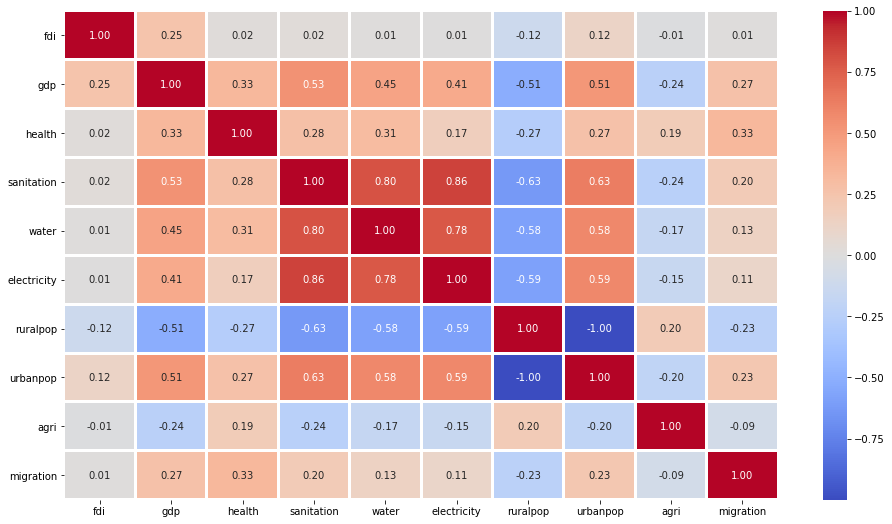

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

***

## Results

### Import Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import sklearn


import statsmodels.api as sm


import datetime
from datetime import datetime, timedelta

import scipy.stats

#import xgboost as xgb
#from xgboost import XGBClassifier, XGBRegressor
#from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')


# Use Feature-Engine library

import feature_engine.imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [14]:
df = pd.read_csv("wbresearch.csv")

In [15]:
df

,fdi,gdp,health,sanitation,water,electricity,ruralpop,urbanpop,agri,migration
0,0.30,690.84,8.48,30.50,51.60,43.00,74.53,25.47,58.07,473007.00
1,7.47,4247.49,5.63,92.10,95.40,100.00,45.67,54.33,43.84,-91750.00
2,0.72,5583.62,6.01,87.00,84.90,100.00,31.13,68.87,17.38,-143268.00
3,NaN,NaN,NaN,62.50,100.00,59.33,12.59,87.41,24.50,NaN
4,NaN,39666.37,8.30,100.00,100.00,100.00,13.29,86.71,42.98,NaN
...,...,...,...,...,...,...,...,...,...,...
243,0.56,2782.91,NaN,92.20,65.10,97.70,25.42,74.58,43.36,-43750.00
244,2.54,10460.11,9.94,65.93,89.49,84.58,47.55,52.45,37.79,0.00
245,-0.04,1289.03,5.55,53.30,54.90,48.41,67.13,32.87,44.60,-50000.00
246,6.94,1686.62,4.75,43.20,63.00,22.06,60.41,39.59,32.06,-34490.00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fdi          219 non-null    float64
 1   gdp          225 non-null    float64
 2   health       221 non-null    float64
 3   sanitation   226 non-null    float64
 4   water        227 non-null    float64
 5   electricity  245 non-null    float64
 6   ruralpop     245 non-null    float64
 7   urbanpop     245 non-null    float64
 8   agri         240 non-null    float64
 9   migration    227 non-null    float64
dtypes: float64(10)
memory usage: 19.5 KB


In [17]:
df.describe(include='all')

,fdi,gdp,health,sanitation,water,electricity,ruralpop,urbanpop,agri,migration
count,219.00,225.00,221.00,226.00,227.00,245.00,245.00,245.00,240.00,227.00
mean,5.74,14751.38,6.81,72.49,88.26,78.44,42.16,57.84,38.14,-98189.77
std,11.78,21611.52,2.79,28.58,14.54,29.21,23.50,23.50,21.15,2705600.34
min,-5.50,244.20,1.41,6.60,39.90,5.06,0.00,8.79,0.47,-16449428.00
25%,1.64,1719.04,4.82,49.49,84.75,59.33,22.88,38.49,22.10,-138149.50
50%,2.90,5967.00,6.23,84.10,94.10,96.12,42.29,57.71,38.58,-10000.00
75%,5.70,15317.14,8.59,97.00,99.25,100.00,61.51,77.12,53.33,29999.00
max,142.26,149160.76,17.05,100.00,100.00,100.00,91.20,100.00,81.30,16458326.00


In [18]:
df.shape

(248, 10)

In [19]:
df.columns

Index(['fdi', 'gdp', 'health', 'sanitation', 'water', 'electricity', 'ruralpop', 'urbanpop', 'agri', 'migration'], dtype='object')

## Data Visualization

### Univariate Data Exploration

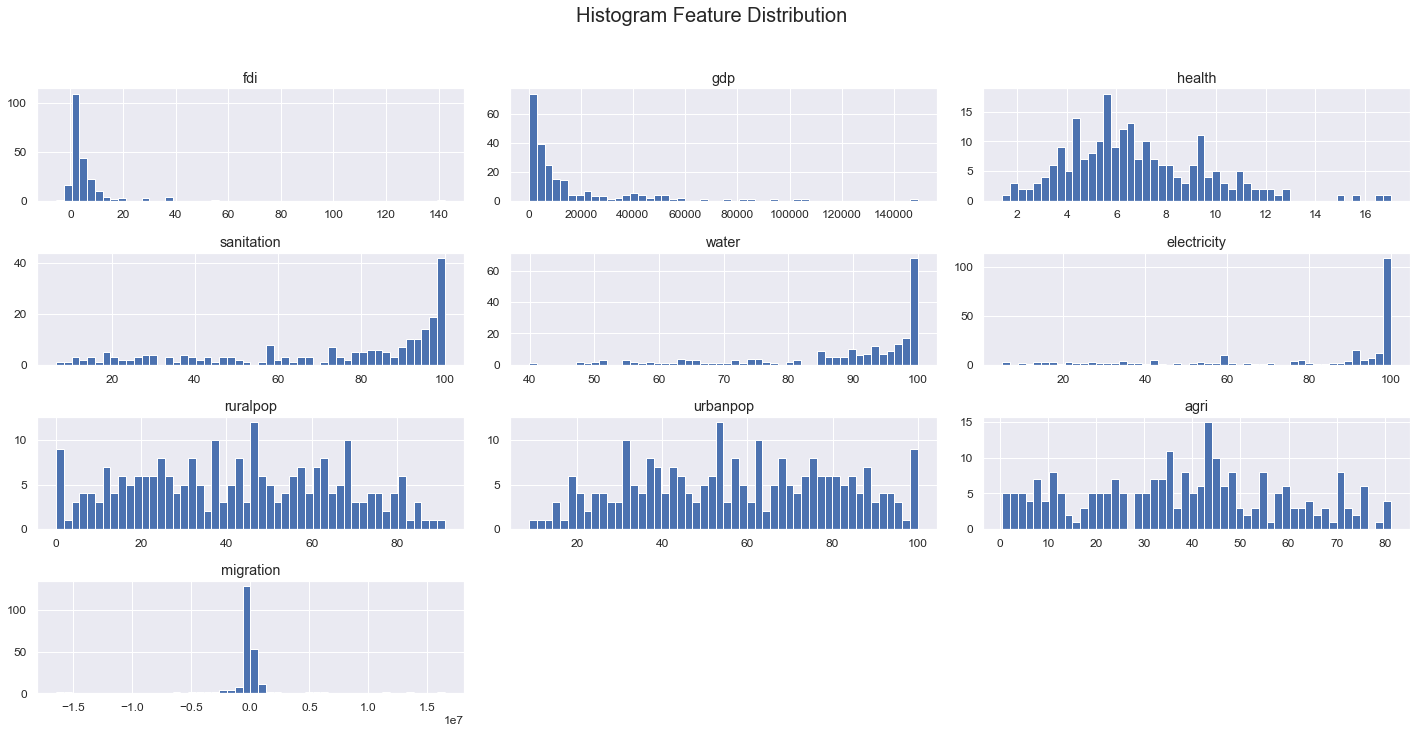

In [20]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

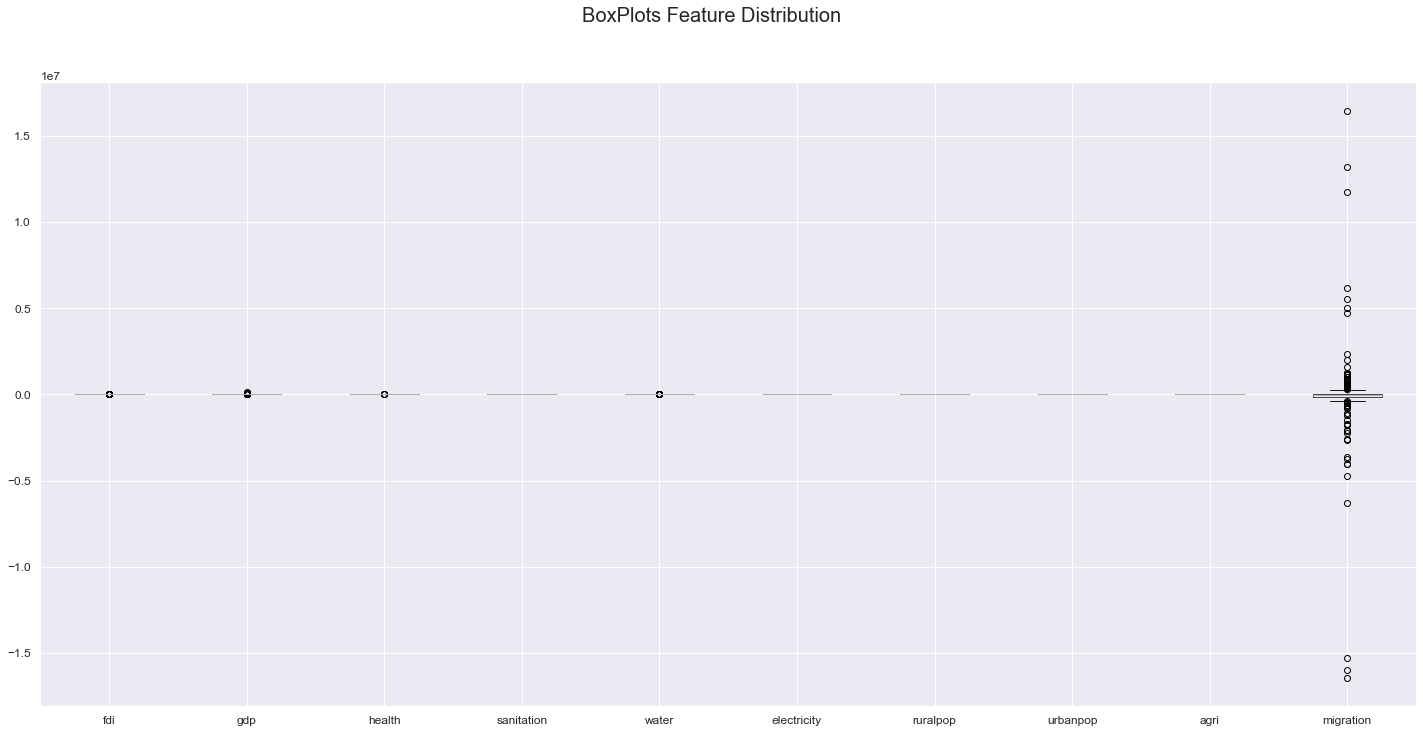

In [21]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['fdi', 'gdp', 'health', 'sanitation', 'water', 'electricity', 'ruralpop', 'urbanpop', 'agri', 'migration'], dtype='object')

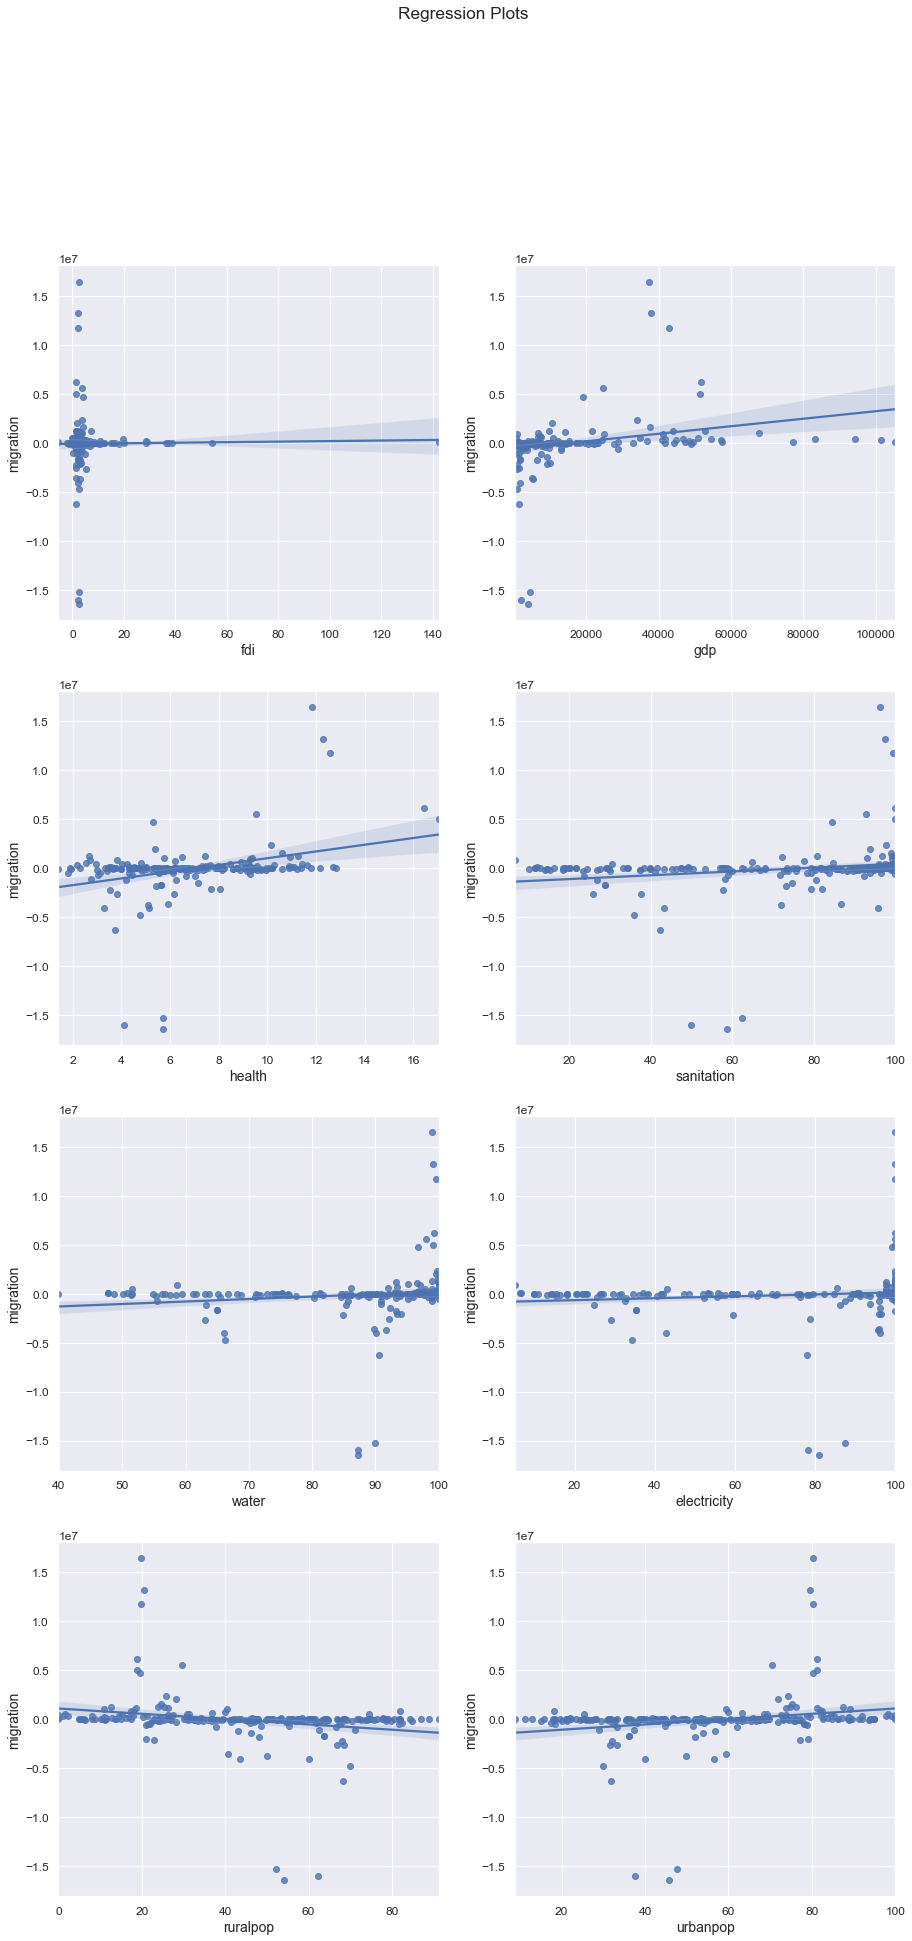

In [23]:
#Plot 4 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4), (ax5 ,ax6), (ax7 ,ax8)) = plt.subplots(4,2, sharex=False, figsize=(15,30))
fig.suptitle('Regression Plots', y=1.0)

sns.regplot(x="fdi", y="migration", data=df, ax=ax1)
#ax1.set_title('Title of the first chart')
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("fdi")
ax1.set_ylabel("migration")

sns.regplot(x="gdp", y="migration", data=df, ax=ax2)
#ax2.set_title('Title of the second chart')
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("gdp")
ax2.set_ylabel("migration")

sns.regplot(x="health", y="migration", data=df, ax=ax3)
#ax3.set_title('Title of the third chart')
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("health")
ax3.set_ylabel("migration")

sns.regplot(x="sanitation", y="migration", data=df, ax=ax4)
#ax4.set_title('Title of the fourth chart')
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("sanitation")
ax4.set_ylabel("migration")

sns.regplot(x="water", y="migration", data=df, ax=ax5)
#ax5.set_title('Title of the fourth chart')
#ax5.tick_params('x', labelrotation=45)
ax5.set_xlabel("water")
ax5.set_ylabel("migration")

sns.regplot(x="electricity", y="migration", data=df, ax=ax6)
#ax6.set_title('Title of the fourth chart')
#ax6.tick_params('x', labelrotation=45)
ax6.set_xlabel("electricity")
ax6.set_ylabel("migration")

sns.regplot(x="ruralpop", y="migration", data=df, ax=ax7)
#ax7.set_title('Title of the fourth chart')
#ax7.tick_params('x', labelrotation=45)
ax7.set_xlabel("ruralpop")
ax7.set_ylabel("migration")

sns.regplot(x="urbanpop", y="migration", data=df, ax=ax8)
#ax8.set_title('Title of the fourth chart')
#ax8.tick_params('x', labelrotation=45)
ax8.set_xlabel("urbanpop")
ax8.set_ylabel("migration")


plt.show()

### Pairplots

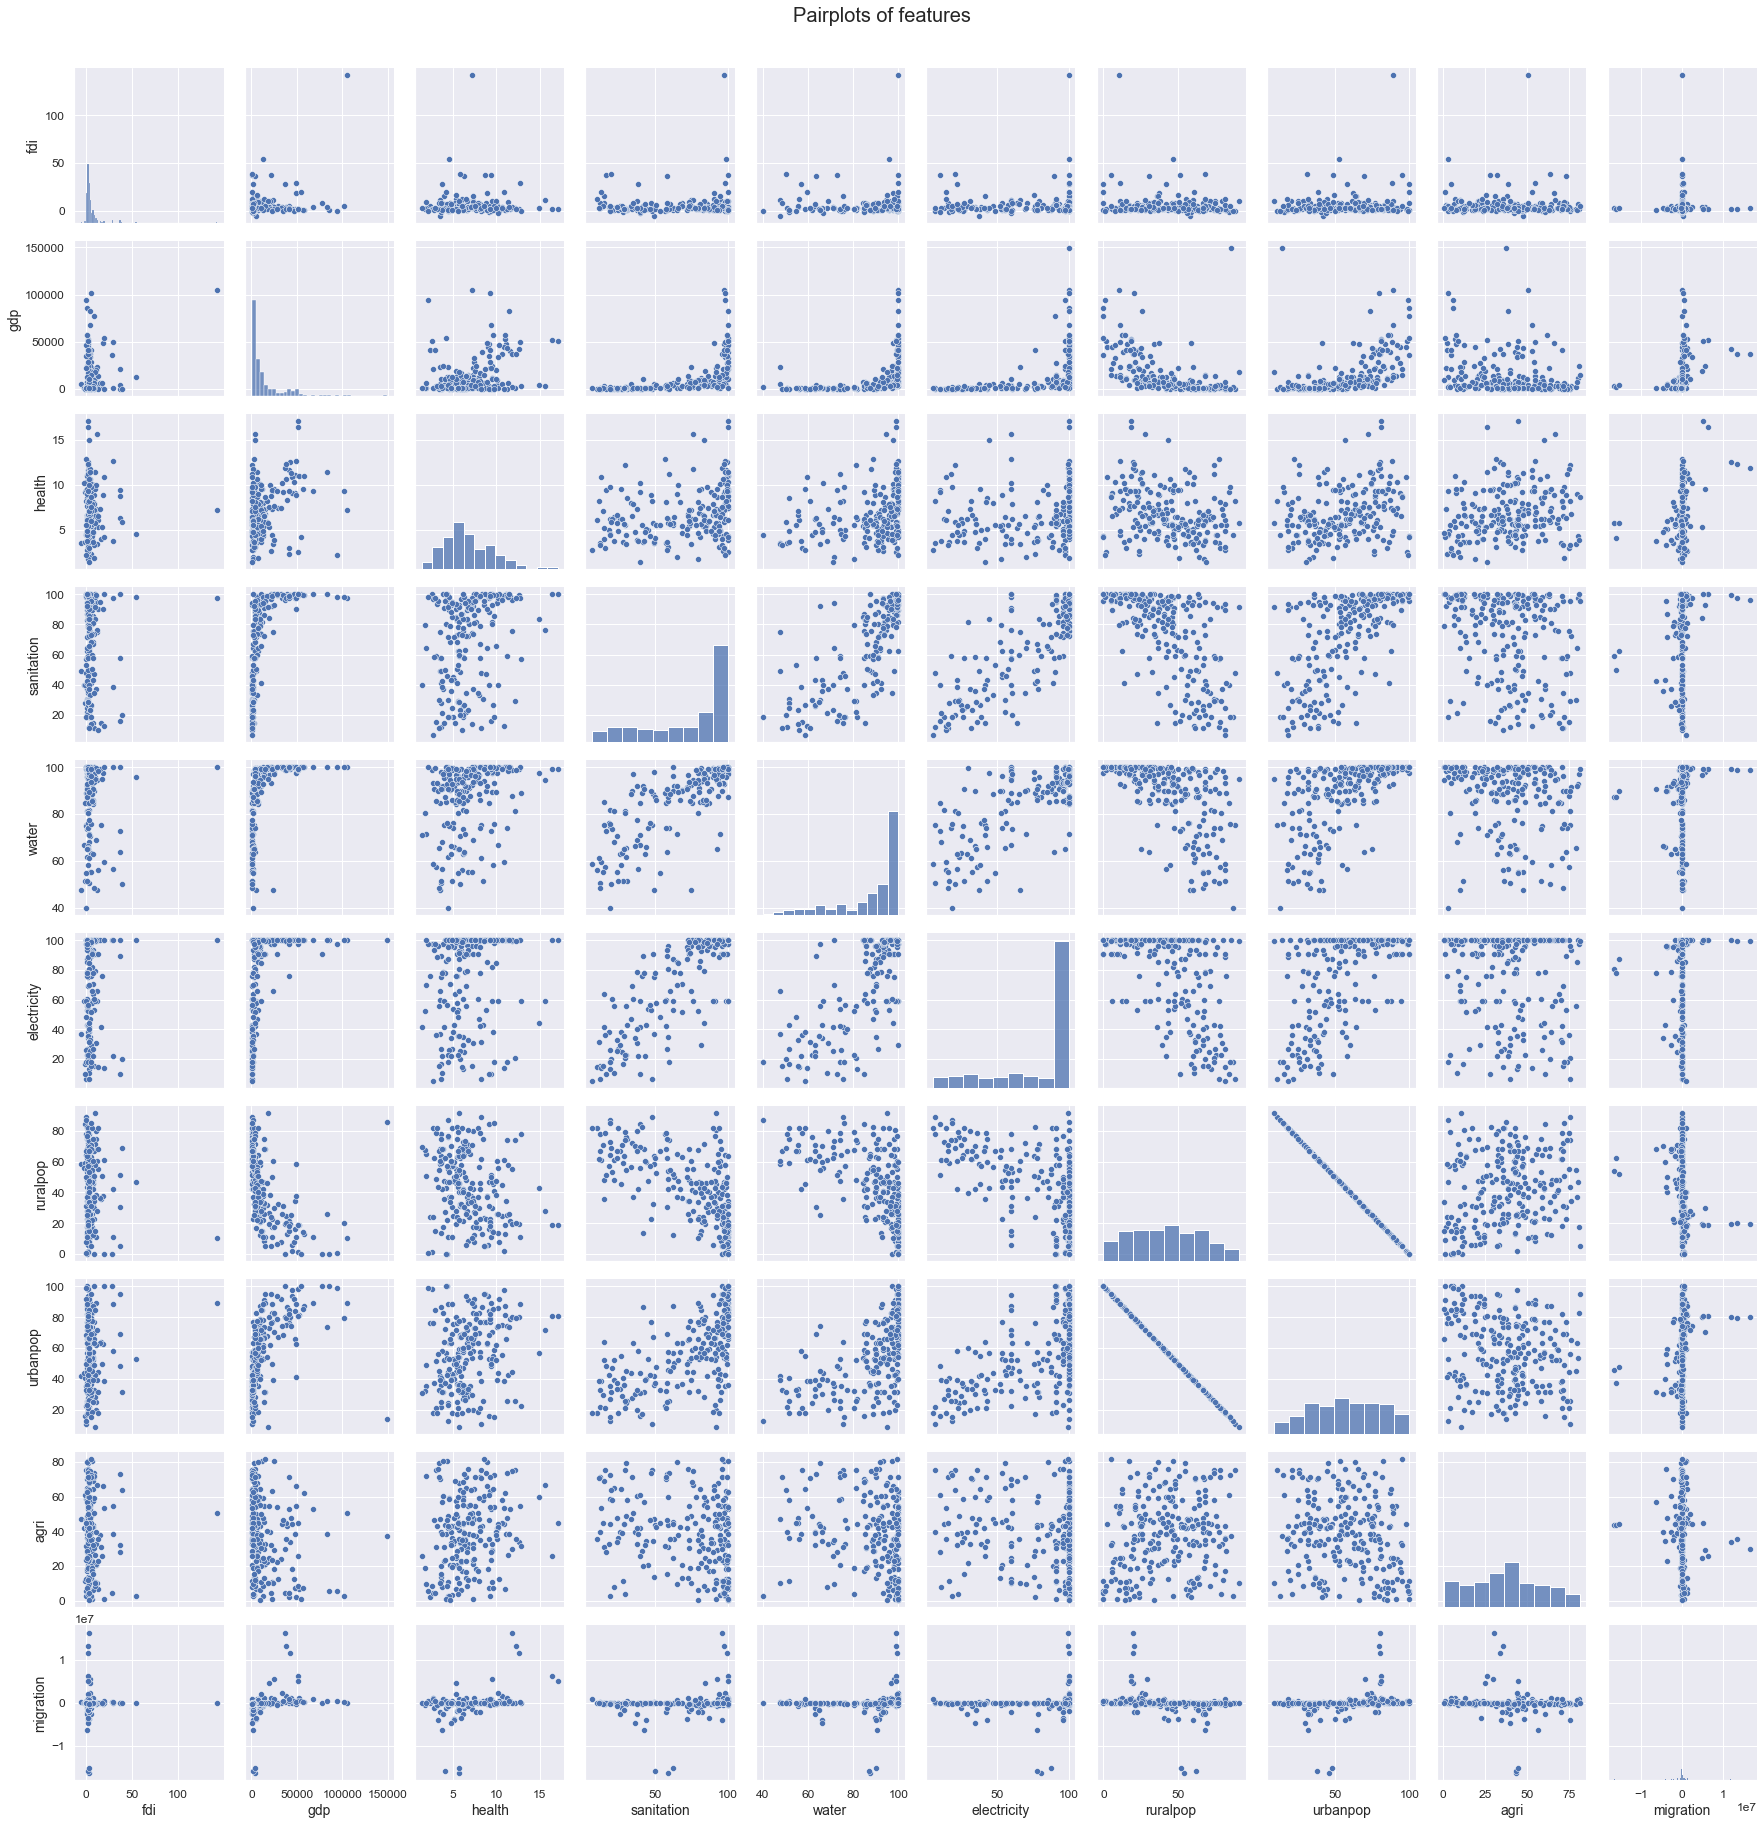

In [24]:
sns.pairplot(df)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

***

From the plots, there is no clear linear relationships between independant variables with target variable.

## Data Preprocessing

### Treat Missing Values

In [25]:
df.isnull().sum()

fdi            29
gdp            23
health         27
sanitation     22
water          21
electricity     3
ruralpop        3
urbanpop        3
agri            8
migration      21
dtype: int64

In [26]:
df.shape

(248, 10)

In [27]:
df.describe()

,fdi,gdp,health,sanitation,water,electricity,ruralpop,urbanpop,agri,migration
count,219.00,225.00,221.00,226.00,227.00,245.00,245.00,245.00,240.00,227.00
mean,5.74,14751.38,6.81,72.49,88.26,78.44,42.16,57.84,38.14,-98189.77
std,11.78,21611.52,2.79,28.58,14.54,29.21,23.50,23.50,21.15,2705600.34
min,-5.50,244.20,1.41,6.60,39.90,5.06,0.00,8.79,0.47,-16449428.00
25%,1.64,1719.04,4.82,49.49,84.75,59.33,22.88,38.49,22.10,-138149.50
50%,2.90,5967.00,6.23,84.10,94.10,96.12,42.29,57.71,38.58,-10000.00
75%,5.70,15317.14,8.59,97.00,99.25,100.00,61.51,77.12,53.33,29999.00
max,142.26,149160.76,17.05,100.00,100.00,100.00,91.20,100.00,81.30,16458326.00


In [28]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [29]:
df = imputer.fit_transform(df)

In [30]:
df.isnull().sum()

fdi            0
gdp            0
health         0
sanitation     0
water          0
electricity    0
ruralpop       0
urbanpop       0
agri           0
migration      0
dtype: int64

In [31]:
df

,fdi,gdp,health,sanitation,water,electricity,ruralpop,urbanpop,agri,migration
0,0.30,690.84,8.48,30.50,51.60,43.00,74.53,25.47,58.07,473007.00
1,7.47,4247.49,5.63,92.10,95.40,100.00,45.67,54.33,43.84,-91750.00
2,0.72,5583.62,6.01,87.00,84.90,100.00,31.13,68.87,17.38,-143268.00
3,2.90,5967.00,6.23,62.50,100.00,59.33,12.59,87.41,24.50,-10000.00
4,2.90,39666.37,8.30,100.00,100.00,100.00,13.29,86.71,42.98,-10000.00
...,...,...,...,...,...,...,...,...,...,...
243,0.56,2782.91,6.23,92.20,65.10,97.70,25.42,74.58,43.36,-43750.00
244,2.54,10460.11,9.94,65.93,89.49,84.58,47.55,52.45,37.79,0.00
245,-0.04,1289.03,5.55,53.30,54.90,48.41,67.13,32.87,44.60,-50000.00
246,6.94,1686.62,4.75,43.20,63.00,22.06,60.41,39.59,32.06,-34490.00


### Treat Duplicate Values

In [32]:
df.duplicated(keep='first').sum()

0

### Treat Data Types

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fdi          248 non-null    float64
 1   gdp          248 non-null    float64
 2   health       248 non-null    float64
 3   sanitation   248 non-null    float64
 4   water        248 non-null    float64
 5   electricity  248 non-null    float64
 6   ruralpop     248 non-null    float64
 7   urbanpop     248 non-null    float64
 8   agri         248 non-null    float64
 9   migration    248 non-null    float64
dtypes: float64(10)
memory usage: 19.5 KB


### Create and save processed dataset

In [34]:
#df.to_csv("wbfinal.csv",index=False)

In [35]:
df = pd.read_csv("wbfinal.csv")

In [36]:
df.shape

(248, 10)

### Train Test Split

In [37]:
X = df.iloc[:,:9]
y = df.iloc[:,9]

In [38]:
X.values, y.values

(array([[   0.2995921 ,  690.842629  ,    8.47919927, ...,   74.532     ,
           25.468     ,   58.06757957],
        [   7.46831756, 4247.485437  ,    5.62743862, ...,   45.67      ,
           54.33      ,   43.84306569],
        [   0.71773317, 5583.61616   ,    6.00727769, ...,   31.13      ,
           68.87      ,   17.38169993],
        ...,
        [  -0.04439374, 1289.034078  ,    5.55337022, ...,   67.126     ,
           32.874     ,   44.60480709],
        [   6.94285335, 1686.618024  ,    4.75449068, ...,   60.413     ,
           39.587     ,   32.06392338],
        [   3.22366798,  850.827694  ,    6.23333354, ...,   67.166     ,
           32.834     ,   41.87669639]]),
 array([   473007.,    -91750.,   -143268.,    -10000.,    -10000.,
           102322.,       -56.,  -1168750.,     30000.,     -9876.,
             1253.,   1023107.,    147089.,    -16125.,      9672.,
            29915.,  -2226481.,      2180.,    120535.,    269998.,
             7594.,    -10000

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((198, 9), (50, 9), (198,), (50,))

## Feature Selection

### Recursive Feature Elimination with Cross Validation (Test each ML model)

In [41]:
model1 = LinearRegression()

In [42]:
model2 = Lasso(random_state=0)

In [43]:
model3 = DecisionTreeRegressor(random_state=0)

In [44]:
model4 = RandomForestRegressor(random_state=0)

In [45]:
rfecv = RFECV(estimator=model2, cv=5,scoring="neg_root_mean_squared_error",verbose=1, step=1, n_jobs=-1)

In [46]:
rfecv.fit(X_train,y_train)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


RFECV(cv=5, estimator=Lasso(random_state=0), n_jobs=-1,
      scoring='neg_root_mean_squared_error', verbose=1)

In [47]:
print("Optimal no of features:", rfecv.n_features_)

Optimal no of features: 6


In [48]:
print("Best features:", rfecv.support_)

Best features: [False False  True  True  True  True  True False  True]


In [49]:
print("Selector Ranking:", rfecv.ranking_)

Selector Ranking: [2 4 1 1 1 1 1 3 1]


In [50]:
X.columns

Index(['fdi', 'gdp', 'health', 'sanitation', 'water', 'electricity', 'ruralpop', 'urbanpop', 'agri'], dtype='object')

Model 2 (Lasso) selects 6 out of 9 variables for our new model.

## Feature Scaling

In [51]:
X_train

array([[    2.80294079,  5445.894718  ,     5.65399128, ...,
           45.873     ,    54.127     ,    40.99722992],
       [    2.30069913,  6721.834908  ,     5.00822363, ...,
           24.533     ,    75.467     ,    43.34926815],
       [    1.85941408, 28647.83524   ,     9.29736713, ...,
           21.098     ,    78.902     ,    53.86137822],
       ...,
       [    1.65024907, 50903.9046    ,     2.56544882, ...,
            1.706     ,    98.294     ,     8.52974186],
       [   15.73259992,  3191.164299  ,     3.97540746, ...,
           35.9       ,    64.1       ,    31.04538799],
       [    5.1142608 ,  3537.281329  ,     5.41421675, ...,
           63.23772629,    36.76227371,    13.41227797]])

In [52]:
scaler = StandardScaler()

In [53]:
X_train_scaled = scaler.fit_transform(X_train)

In [54]:
X_test_scaled = scaler.transform(X_test)

In [55]:
X_train_scaled

array([[-0.25294346, -0.40496965, -0.38721389, ...,  0.1606332 ,
        -0.1606367 ,  0.2115646 ],
       [-0.29434692, -0.34441394, -0.64022407, ..., -0.74778921,
         0.74778705,  0.32683299],
       [-0.33072528,  0.69618708,  1.04025178, ..., -0.89401371,
         0.89401177,  0.84200913],
       ...,
       [-0.34796829,  1.75245308, -1.59729721, ..., -1.71951171,
         1.71951099, -1.37959789],
       [ 0.81294308, -0.51197844, -1.0448789 , ..., -0.26390741,
         0.26390454, -0.27615399],
       [-0.06240442, -0.49555184, -0.48115696, ...,  0.89983219,
        -0.89983679, -1.14031518]])

In [56]:
X_test_scaled

array([[-0.21825984, -0.62305008, -0.16022902, -1.28537295, -0.82190573,
        -1.25588248,  1.06705486, -1.06705971,  0.25466538],
       [-0.24513354, -0.38023812, -0.16022902,  0.38414084,  0.38194575,
         0.60590636,  0.00827876, -0.00828204,  0.09323043],
       [-0.35643338,  1.27531468,  1.94664014,  0.9048102 ,  0.80982068,
         0.73574973, -0.89052305,  0.89052111,  0.78420865],
       [-0.16422809, -0.5663021 ,  2.01438977,  0.08795037, -0.06768553,
         0.73574973,  0.55524781, -0.5552519 ,  1.87125662],
       [-0.34835479, -0.20291118, -0.21107301,  0.36974917,  0.45446692,
         0.70564314, -0.87294206,  0.87294009,  0.89245964],
       [ 0.06965358, -0.44747586, -1.0420818 ,  0.63371262,  0.49072751,
        -0.62476985,  0.22580634, -0.22580994, -0.65759253],
       [-0.32862649, -0.6278204 , -0.04154747, -1.39595223,  0.09186106,
        -0.29121933,  1.2715989 , -1.27160405,  1.70482089],
       [ 1.90031087,  1.68462375,  2.36509095,  0.87270654,  0

## Model Training

## Using Regression or Classification Models

### K-Fold Cross-Validation (Generalization Performance)

In [57]:
lasso = Lasso(random_state=0)

In [58]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [59]:
lasso_cv = cross_validate(estimator=lasso, X=X_train_scaled, y=y_train, scoring="neg_root_mean_squared_error",
                            cv=kf, n_jobs=-1,return_train_score=True)

In [60]:
lasso_cv

{'fit_time': array([0.00099778, 0.00199533, 0.00498724, 0.00099826, 0.00598478]),
 'score_time': array([0.00099611, 0.        , 0.        , 0.00099587, 0.0010004 ]),
 'test_score': array([-3138096.69658398, -2490401.41178899, -2053996.62388626,
        -2687320.11584617,  -865410.50323466]),
 'train_score': array([-2078470.47000646, -2299170.9750352 , -2392965.57730008,
        -2241988.45163901, -2564741.64225141])}

In [61]:
np.mean(lasso_cv["train_score"]), np.std(lasso_cv["train_score"])

(-2315467.423246431, 161230.20156291054)

In [62]:
np.mean(lasso_cv["test_score"]), np.std(lasso_cv["test_score"])

(-2247045.07026801, 773720.7771476094)

Cross-validation scores for both train and test acceptable.

In [63]:
lasso_model = Lasso(random_state=0)

In [64]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=0)

In [65]:
lasso_pred = lasso_model.predict(X_test_scaled)

In [66]:
lasso_pred

array([ -603453.19120308,  -334056.55528799,  1987713.28014251,
         608960.15283356,  -234579.0125906 ,  -496576.86178877,
       -1587641.71599513,  2235017.67116915, -1277578.7963206 ,
         -69211.84567274,   740727.6174006 ,  -292446.88547985,
         899073.96022103,    20673.19275671,   973040.44307589,
         -41557.53744195,  2119691.39370042,  -429106.99727561,
         598065.20101245,  -302376.59632306, -2128832.74470593,
        -368510.18863117,   160753.01769488,  -967119.48110553,
         117916.85658373,  -511335.09822084,   732388.26686068,
       -1104842.04324412,  -608328.59980334,  2347395.17444047,
        -412697.85298733,   310369.06215966,  -630600.1272115 ,
         518008.87434103,    34716.63644929,   -81901.05256173,
        1851939.54882276,   619545.35937484,  1944833.42016364,
       -2099312.52282926, -1059642.08748881,  -283861.5553557 ,
        1141507.52284002, -1081420.69566566,  -317091.60737871,
          90094.07364098,  3883831.26257

### Model Evaluation

In [67]:
mse = mean_squared_error(y_test,lasso_pred)
mse

6639017576204.85

In [68]:
rmse = np.sqrt(mse)
rmse

2576629.111107155

In [69]:
r2score = r2_score(y_test,lasso_pred)
r2score

0.07642213312891699

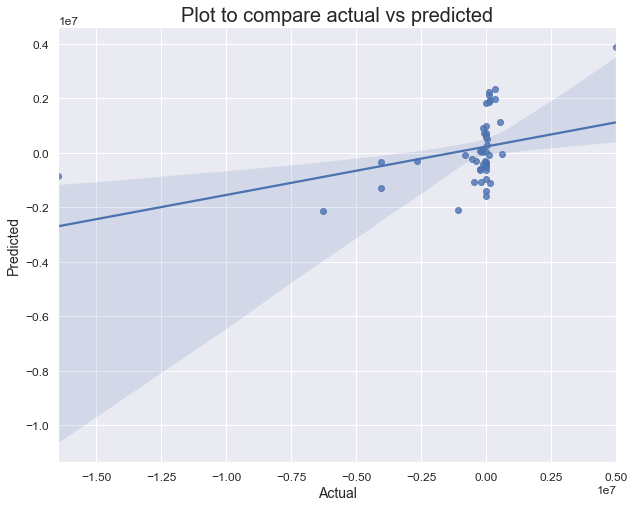

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=lasso_pred, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

***

## Conclusion and Limitations

**Conclusions**:

- The result generated by the model was unsatisfactory based on metrics score.
- There may be other factors influencing net migration which is not captured by World Bank.
- The results are unable to answer the research question.
- People migration will continue unabated unless we determine the root causes.


**Limitations**:

- The dataset only covers year 2012. More data is needed for previous years from 2012.

#### Python code done by Dennis Lam